In [19]:
import os
import re
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

### Funzioni varie

In [20]:
def read_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        content = file.read()
        
    # Usa una regular expression per estrarre i dati
    pattern = r"data_instance.id: (\d+)\s+data_instance.label: (\d+)\s+Prediction: (\d+)\s+node embeddings: tensor\(\[\[([0-9.]+), ([0-9.]+)\]\], dtype=torch.float64\)"
    matches = re.findall(pattern, content)
    
    for match in matches:
        instance_id = int(match[0])
        label = int(match[1])
        prediction = int(match[2])
        x = float(match[3])
        y = float(match[4])
        data.append((instance_id, label, x, y, prediction))
    
    return data

In [21]:
def calculate_metrics(data):
    y_true = [item[1] for item in data]
    y_pred = [item[4] for item in data]
    
    cm = confusion_matrix(y_true, y_pred)

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    
    return {
        #"Confusion Matrix": cm,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

In [22]:
# Funzione per plottare i dati
def plot_data(data):
    # d[1] è label, d[4] è prediction

    # Separiamo i dati in due gruppi per le previsioni 0 e 1
    x_0_correct = [d[2] for d in data if d[1] == d[4] and d[1] == 0]  # x quando label = previsione = 0
    y_0_correct = [d[3] for d in data if d[1] == d[4] and d[1] == 0]  # y quando label = previsione = 0
    x_1_correct = [d[2] for d in data if d[1] == d[4] and d[1] == 1]  # x quando label = previsione = 1
    y_1_correct = [d[3] for d in data if d[1] == d[4] and d[1] == 1]  # y quando label = previsione = 1
    
    x_0_incorrect = [d[2] for d in data if d[1] != d[4] and d[1] == 0]  # x quando label != previsione = 0
    y_0_incorrect = [d[3] for d in data if d[1] != d[4] and d[1] == 0]  # y quando label != previsione = 0
    x_1_incorrect = [d[2] for d in data if d[1] != d[4] and d[1] == 1]  # x quando label != previsione = 1
    y_1_incorrect = [d[3] for d in data if d[1] != d[4] and d[1] == 1]  # y quando label != previsione = 1

    # Conteggi per ogni categoria
    tn = len(x_0_correct)
    tp = len(x_1_correct)
    fp = len(x_0_incorrect)
    fn = len(x_1_incorrect)
    
    plt.scatter(x_0_correct, y_0_correct, color='blue', label=f'Class 0 (classified as 0): {tn}', alpha=0.15, marker='o', s=30)
    plt.scatter(x_0_incorrect, y_0_incorrect, color='midnightblue', label=f'Label 0 (classified as 1): {fp}', alpha=0.75, marker='x', s=8)
    
    plt.scatter(x_1_correct, y_1_correct, color='red', label=f'Label 1 (classified as 1): {tp}', alpha=0.15, marker='o', s=30)
    plt.scatter(x_1_incorrect, y_1_incorrect, color='darkred', label=f'Label 1 (classified as 0): {fn}', alpha=0.75, marker='x', s=8)

    # Aggiungi le metriche come testo

    metrics = calculate_metrics(data)
    metrics.update({'False positive rate': fn/(fn+tn)})

    # Aggiungi il testo a lato del grafico (coordinate x_offset, y_offset)
    for i, (metric, value) in enumerate(metrics.items()):
        plt.text(1.05, 0.6 - i*0.06, f"{metric}: {value:.3f}", fontsize=10, transform=plt.gca().transAxes)

    # Etichette e legende
    plt.xlabel(r'$x_0$')
    plt.ylabel(r'$x_1$')
    plt.title(r'Node embeddings $(x_0,x_1)$ - entire dataset')
    plt.legend()
    plt.grid(True)


### Lettura dati e grafico

In [27]:
# Ricava il nome del file più recente
file_name = max(os.listdir("..\\..\\explainability\GRETEL-repo\\output\\logs\\"), key=lambda f: os.path.getmtime(os.path.join("..\\..\\explainability\GRETEL-repo\\output\\logs\\", f)))
file_name = file_name.split('.')[0]
file_name

'26280-Martina'

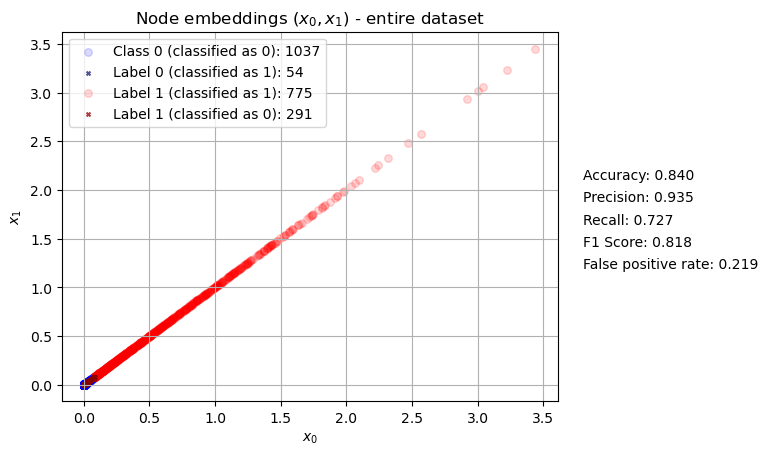

In [28]:
data = read_data("..\\..\\explainability\GRETEL-repo\\output\\embeddings\\" + file_name + ".txt")
plot_data(data)

plt.savefig("..\\..\\explainability\GRETEL-repo\\output\\embeddings\\" + file_name + ".png", bbox_inches='tight')
plt.show()